
Processing: abomasnow.png


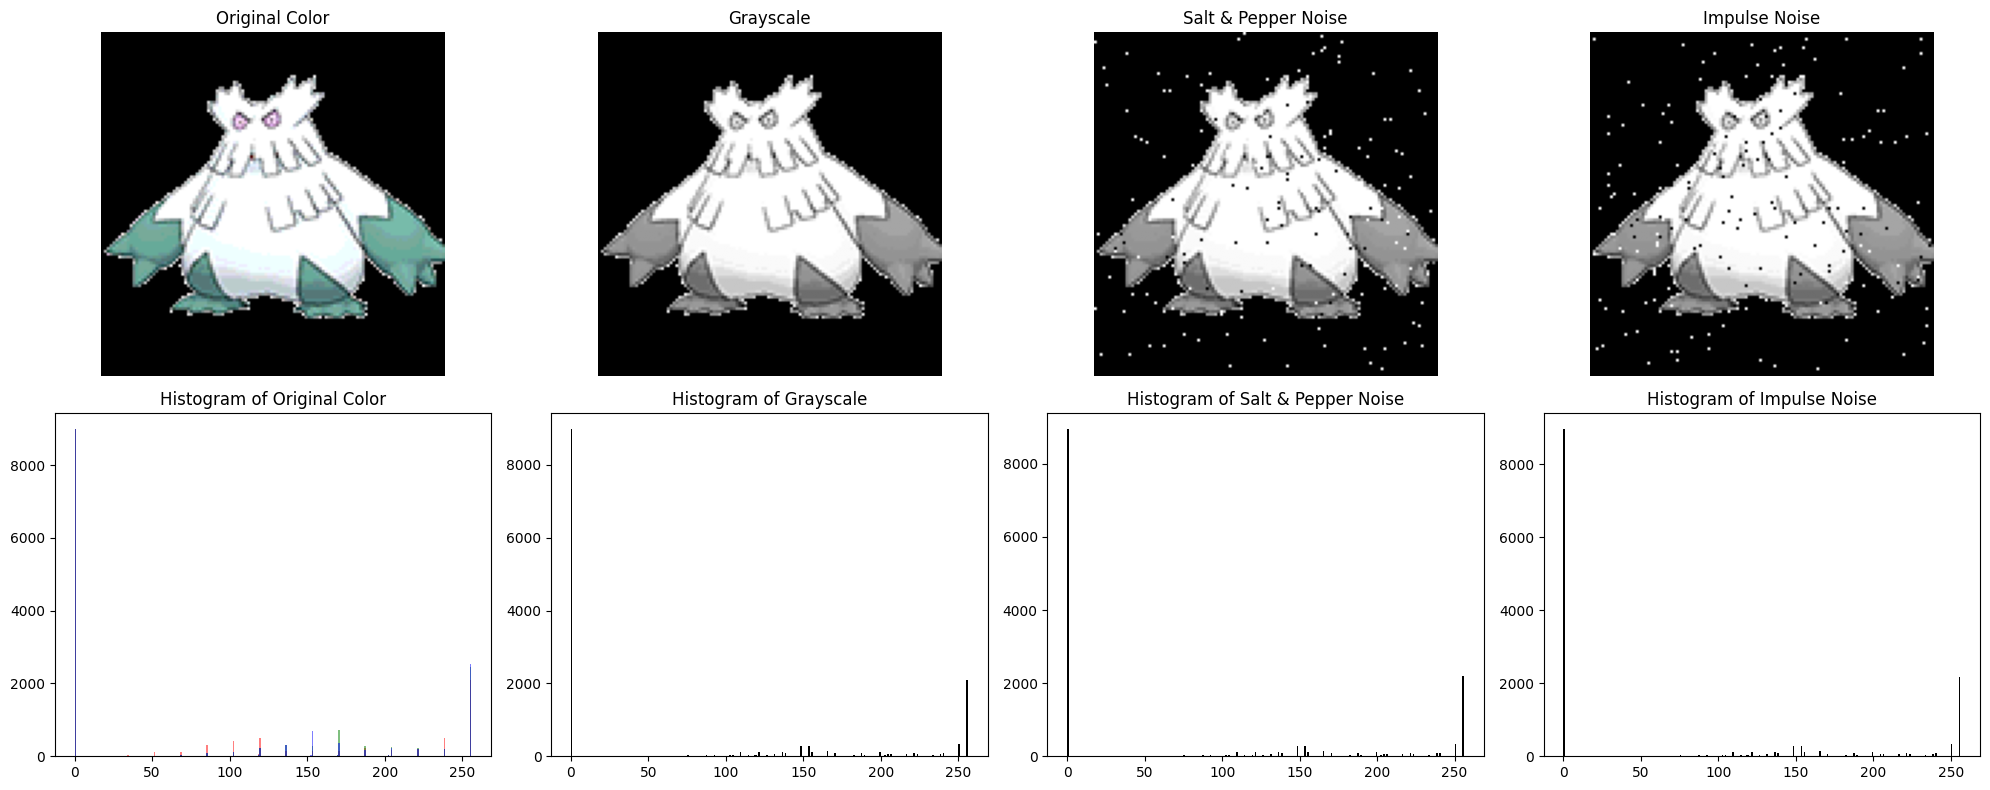


Processing: abra.png


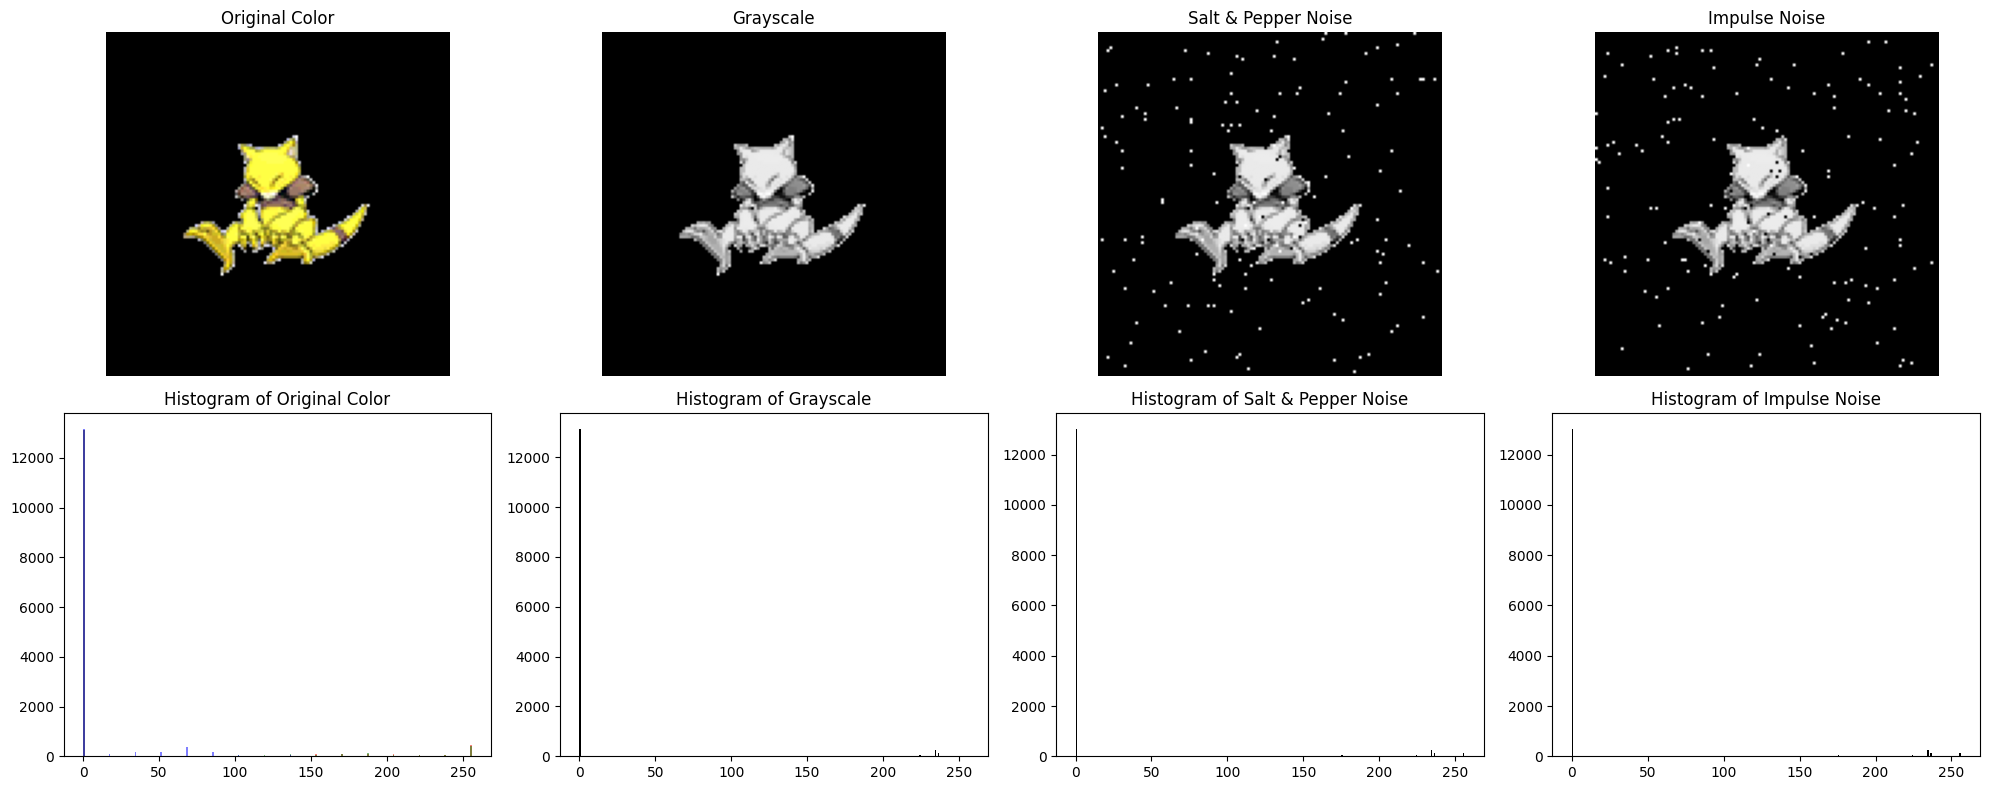


Processing: absol.png


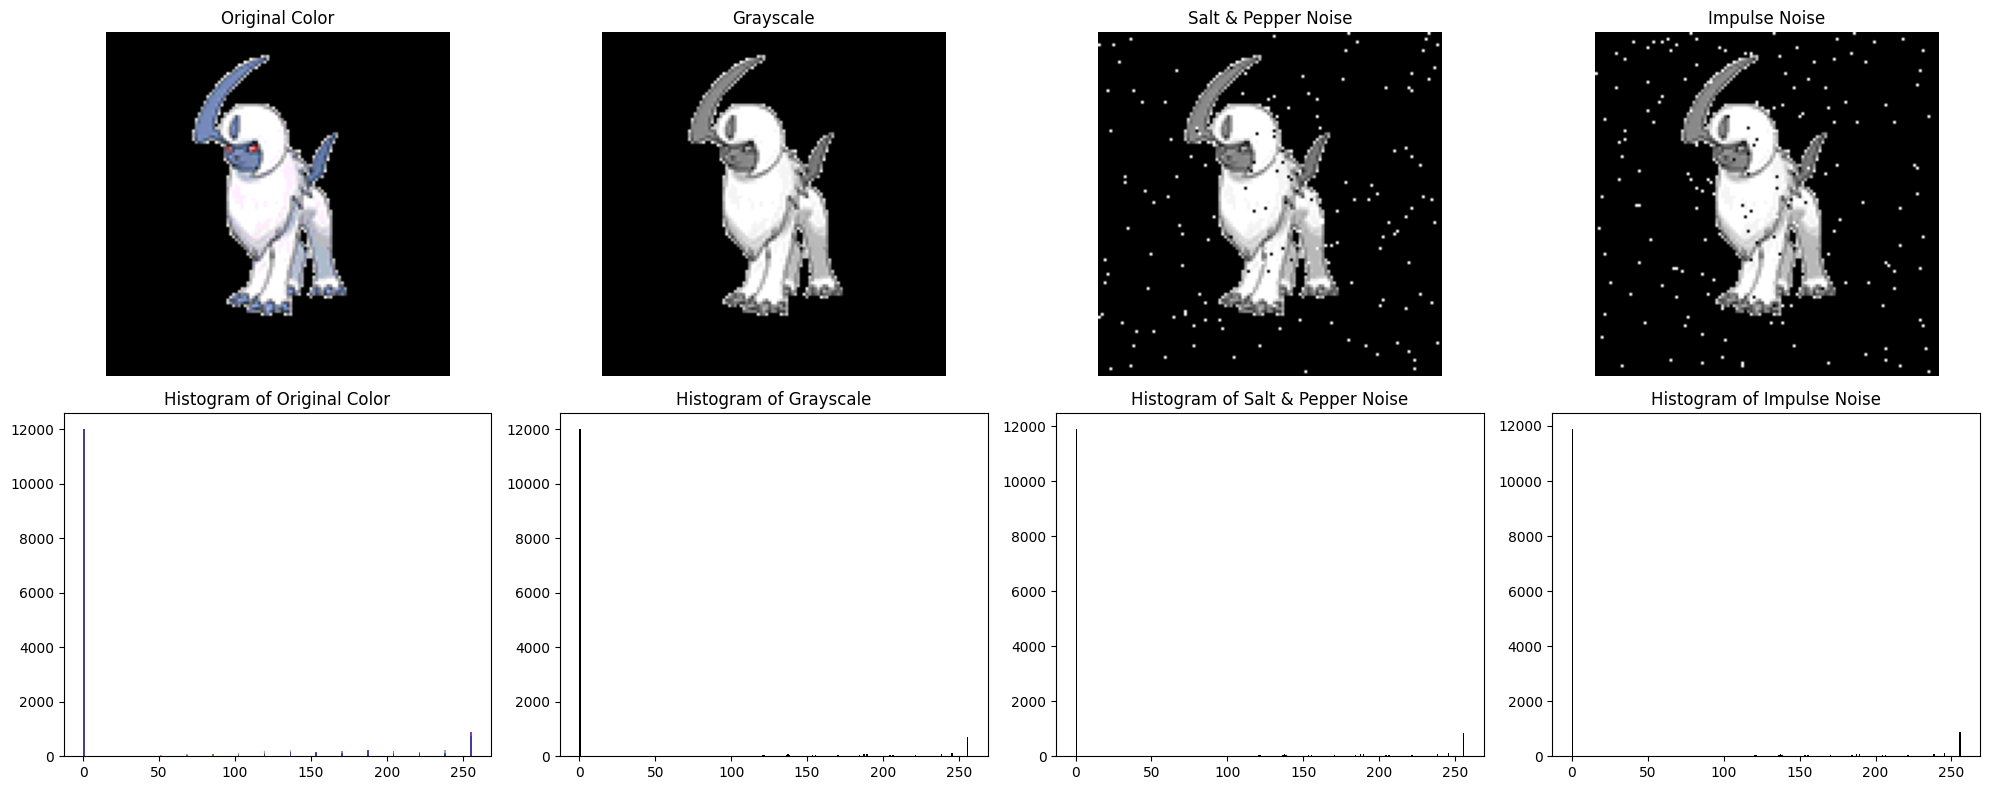


Processing: accelgor.png


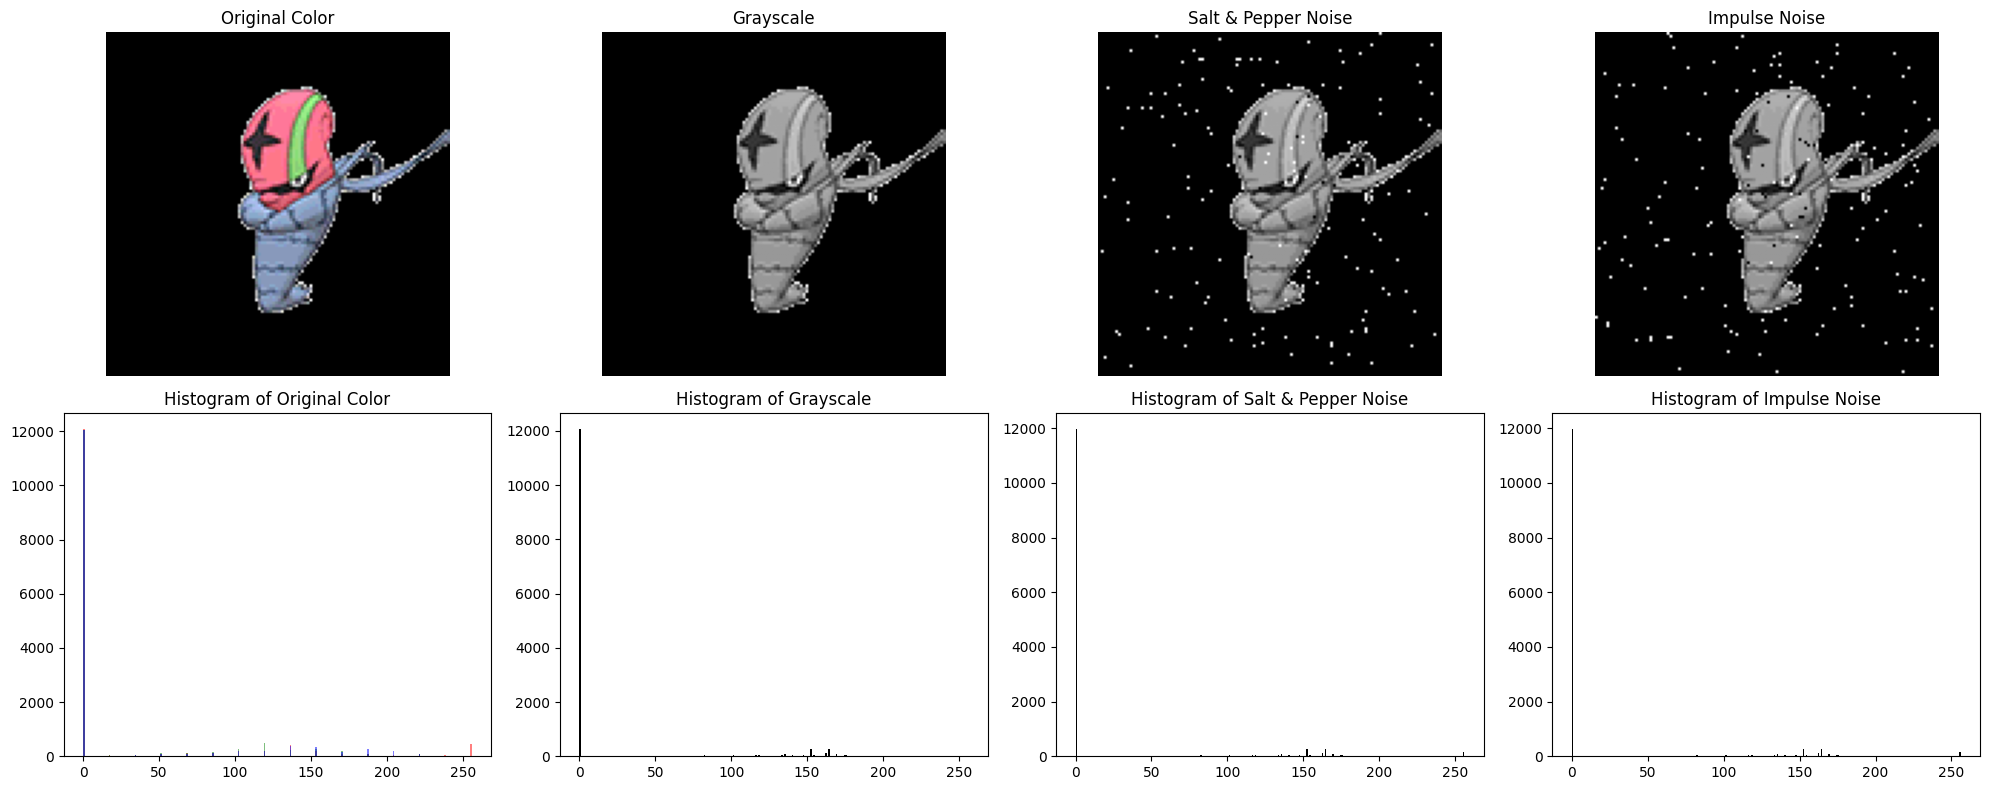


Processing: aegislash-blade.png


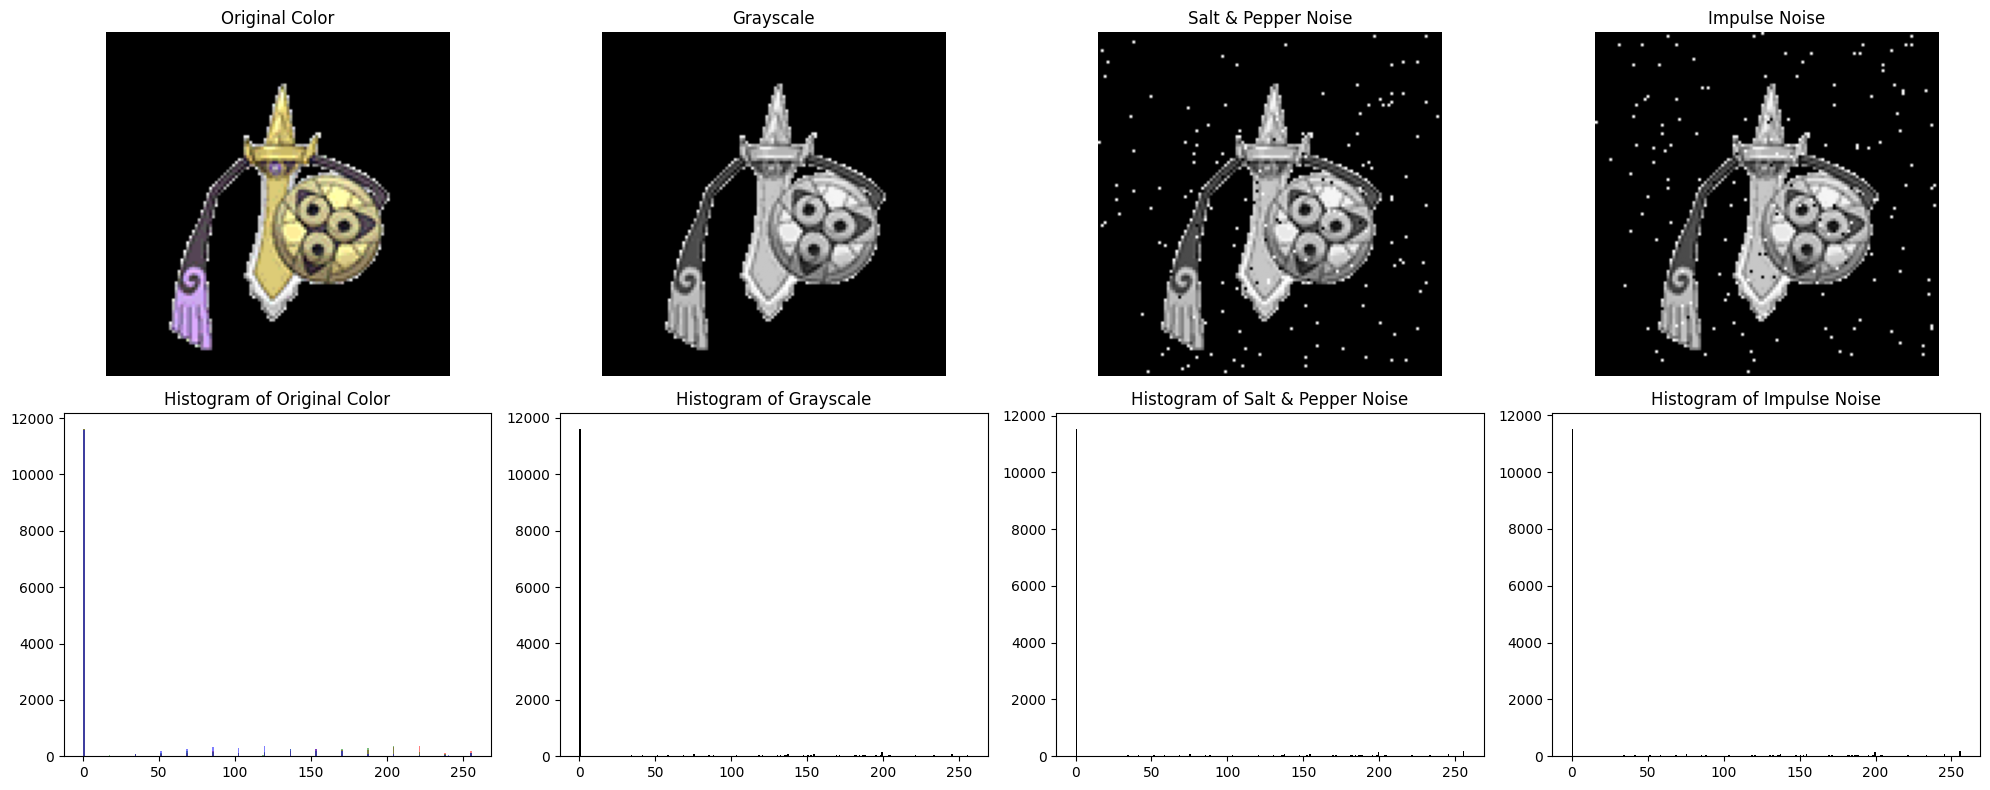


Processing: aerodactyl.png


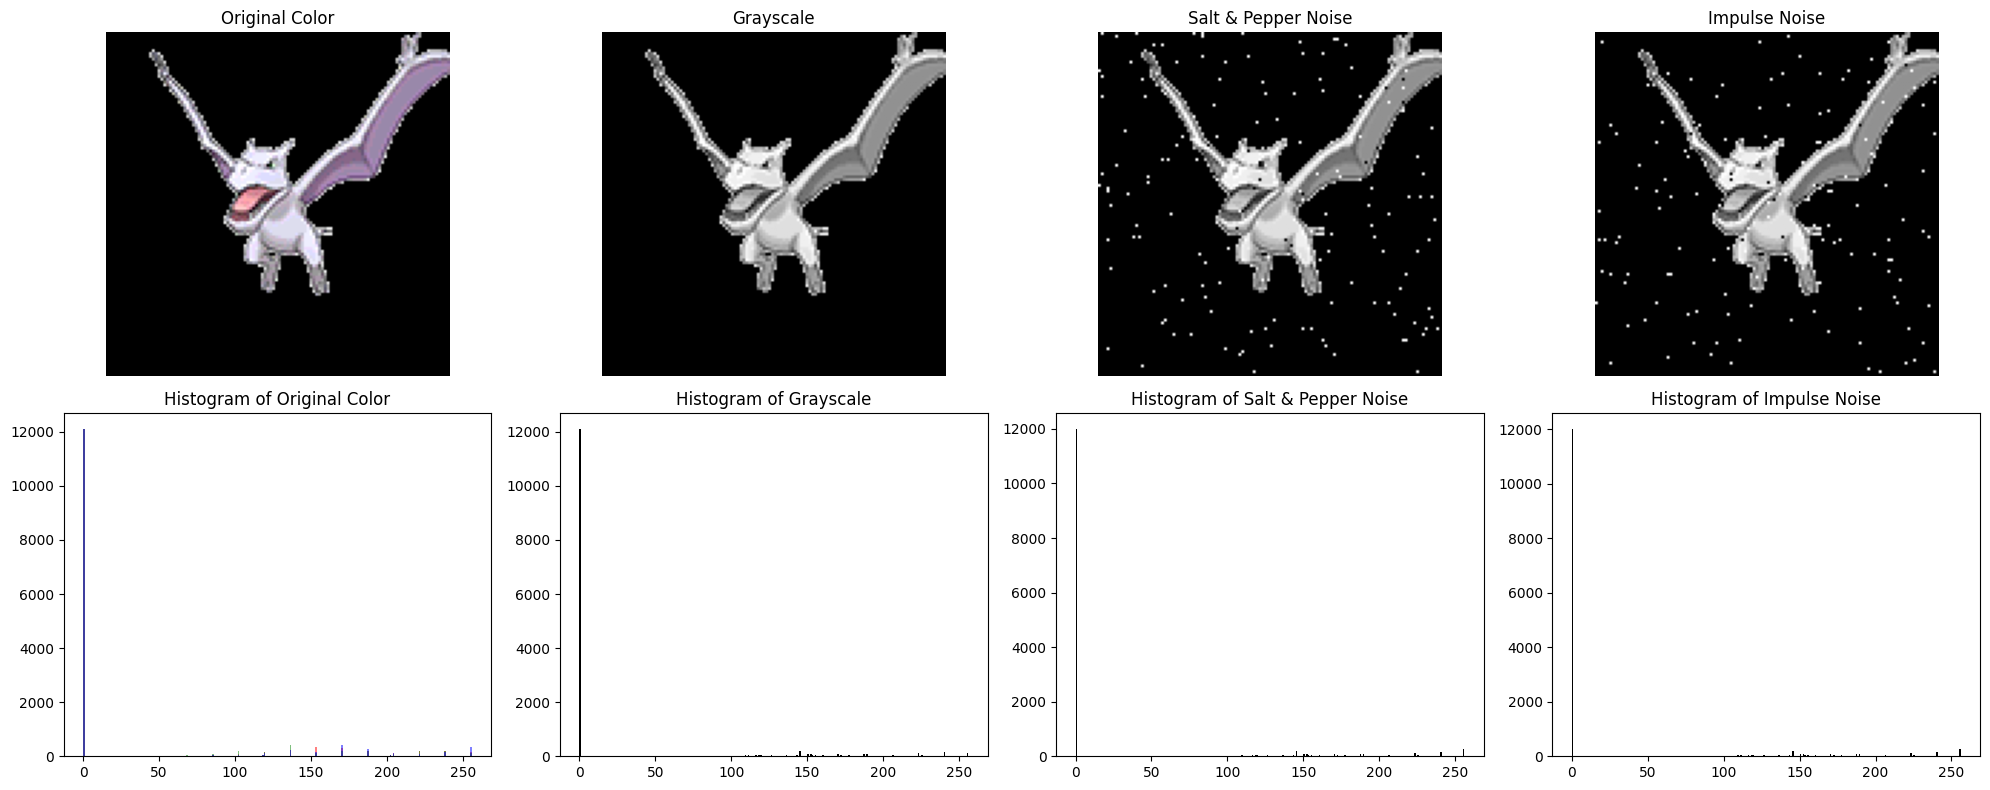


Processing: aggron.png



Processing: aipom.png


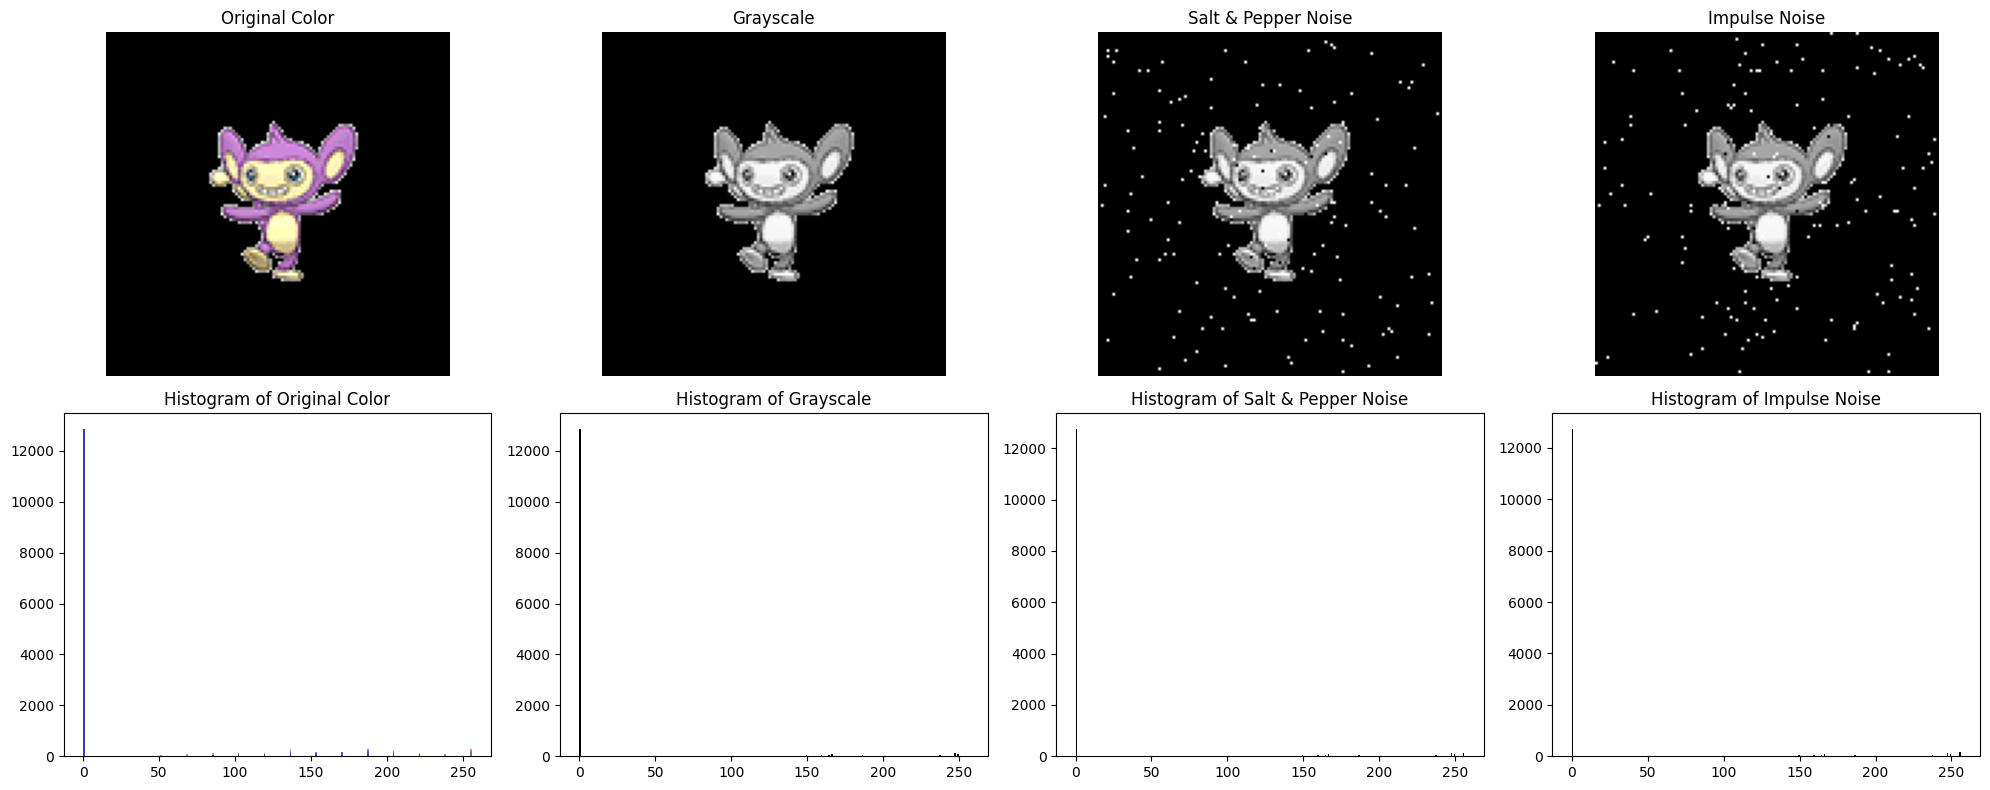


Processing: alakazam.png



Processing: alomomola.png


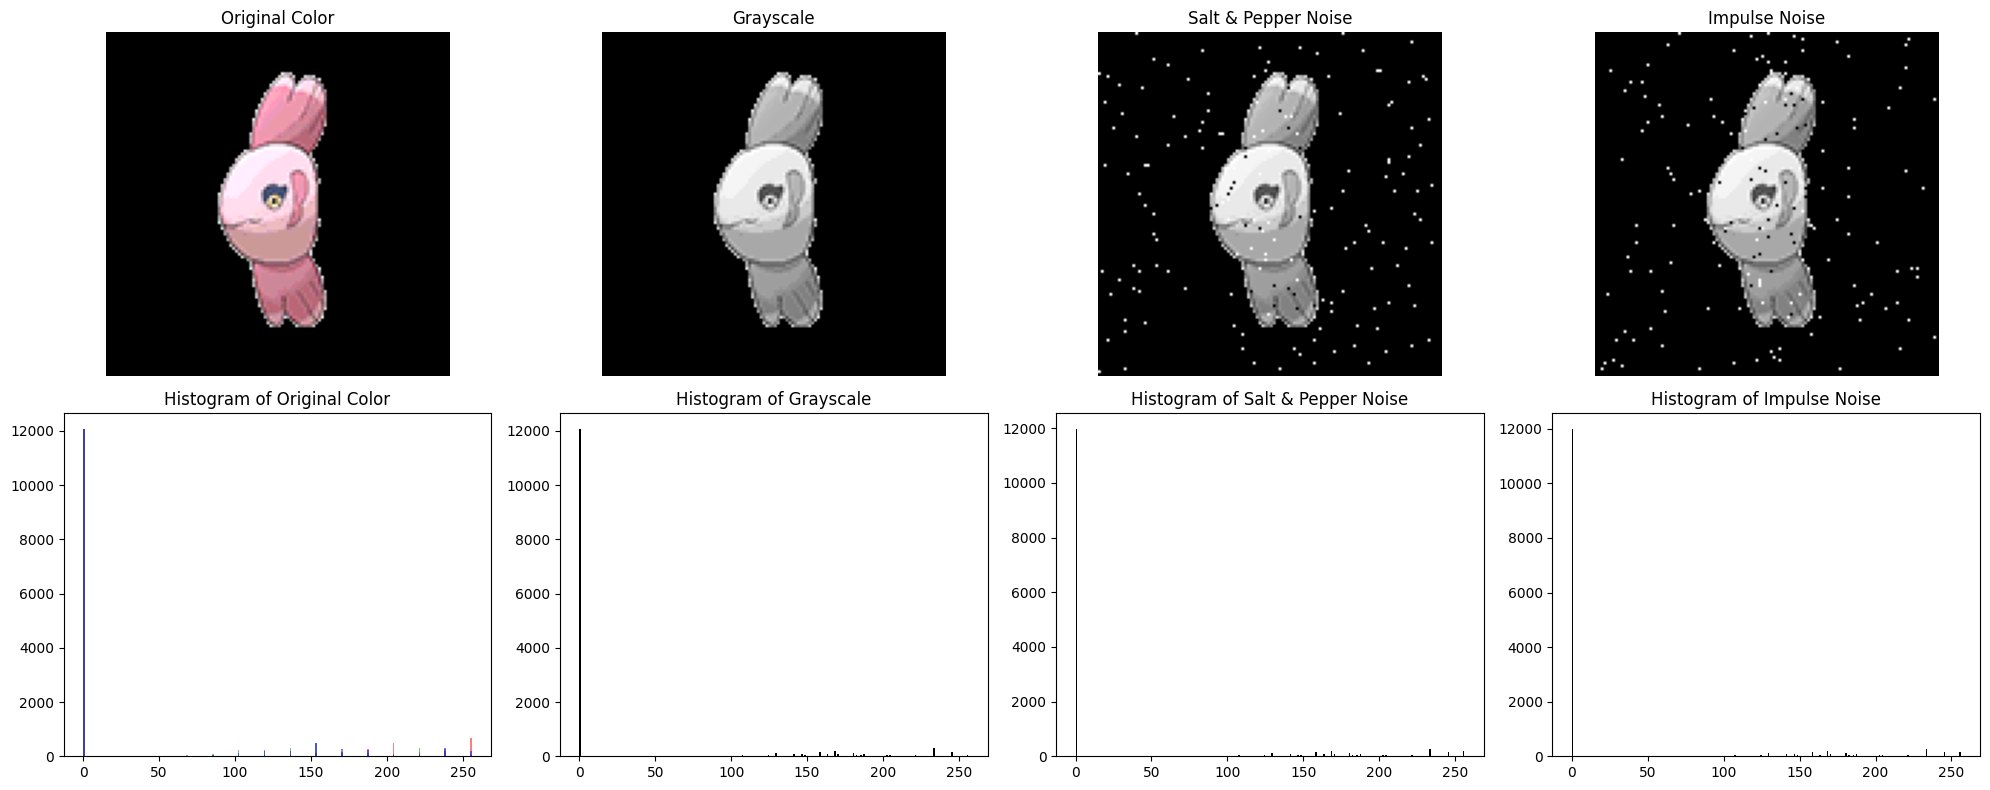


Processing: altaria.png


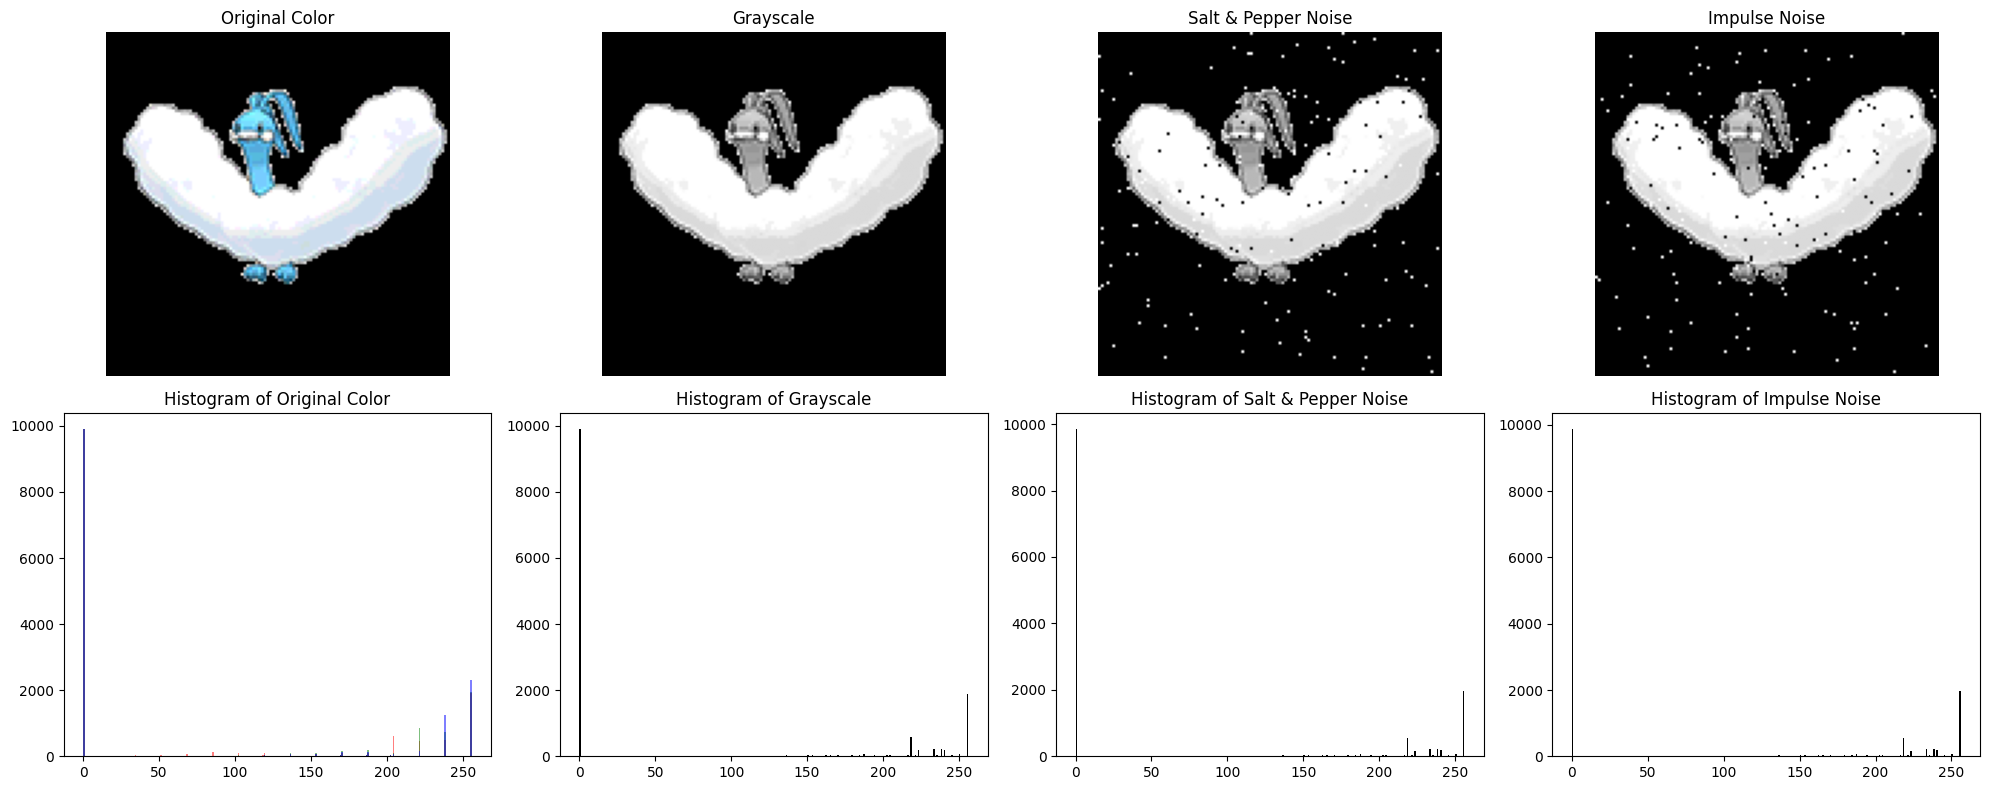


Processing: amaura.png


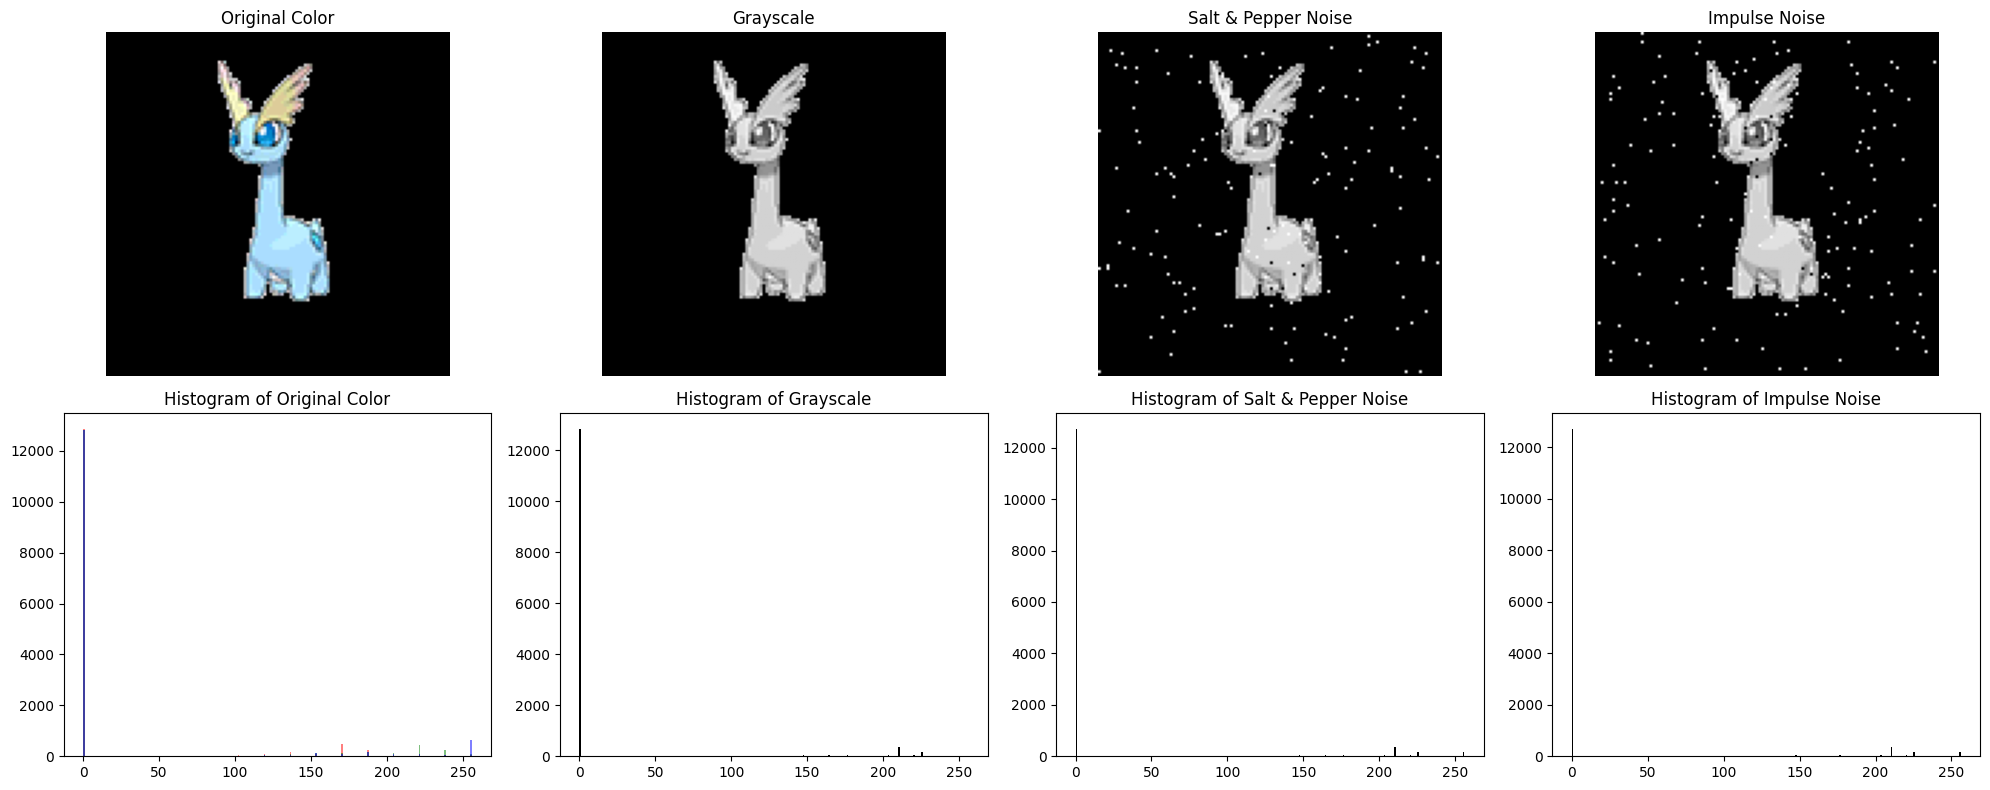


Processing: ambipom.png


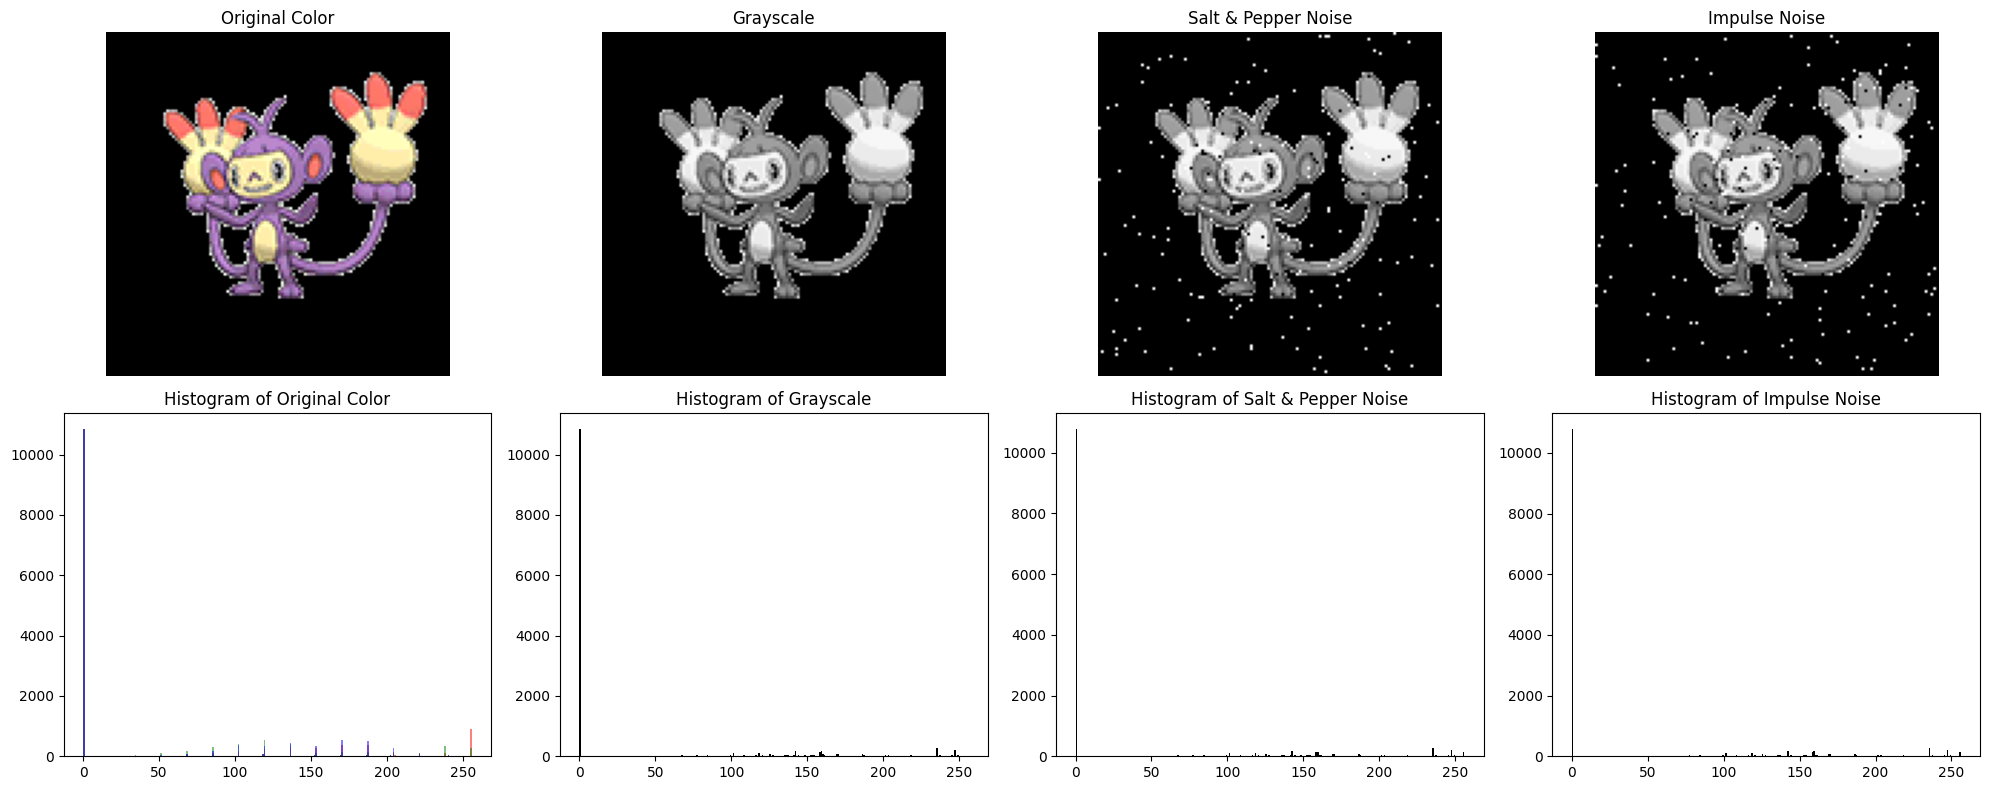


Processing: amoonguss.png


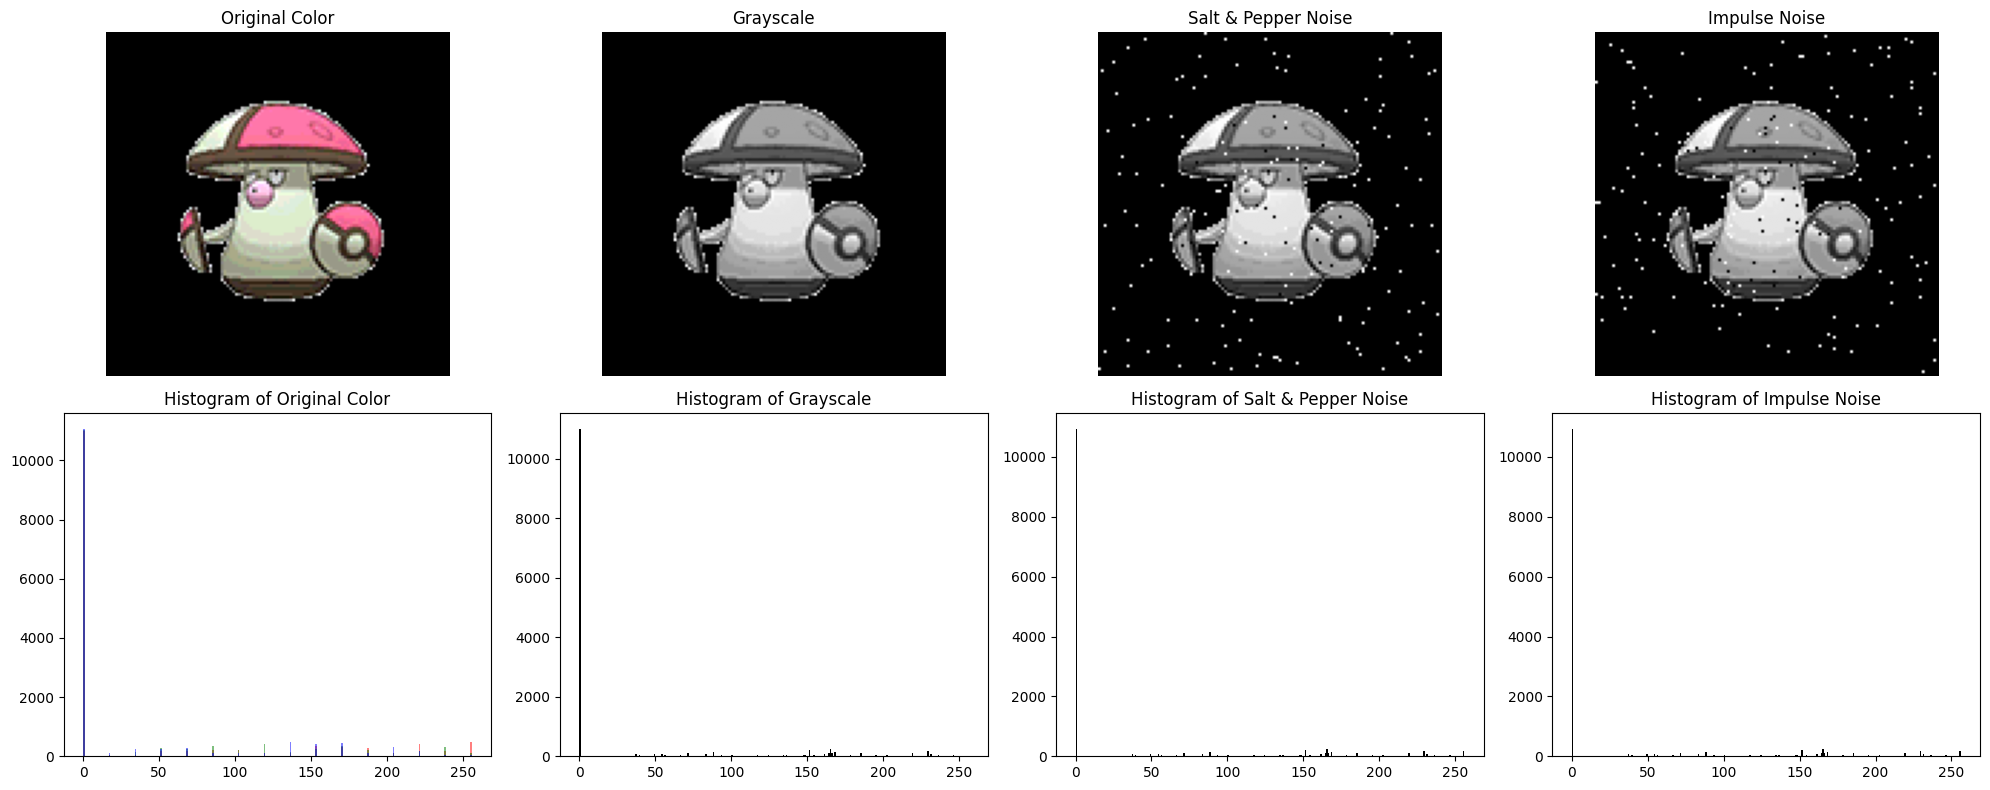


Processing: ampharos.png


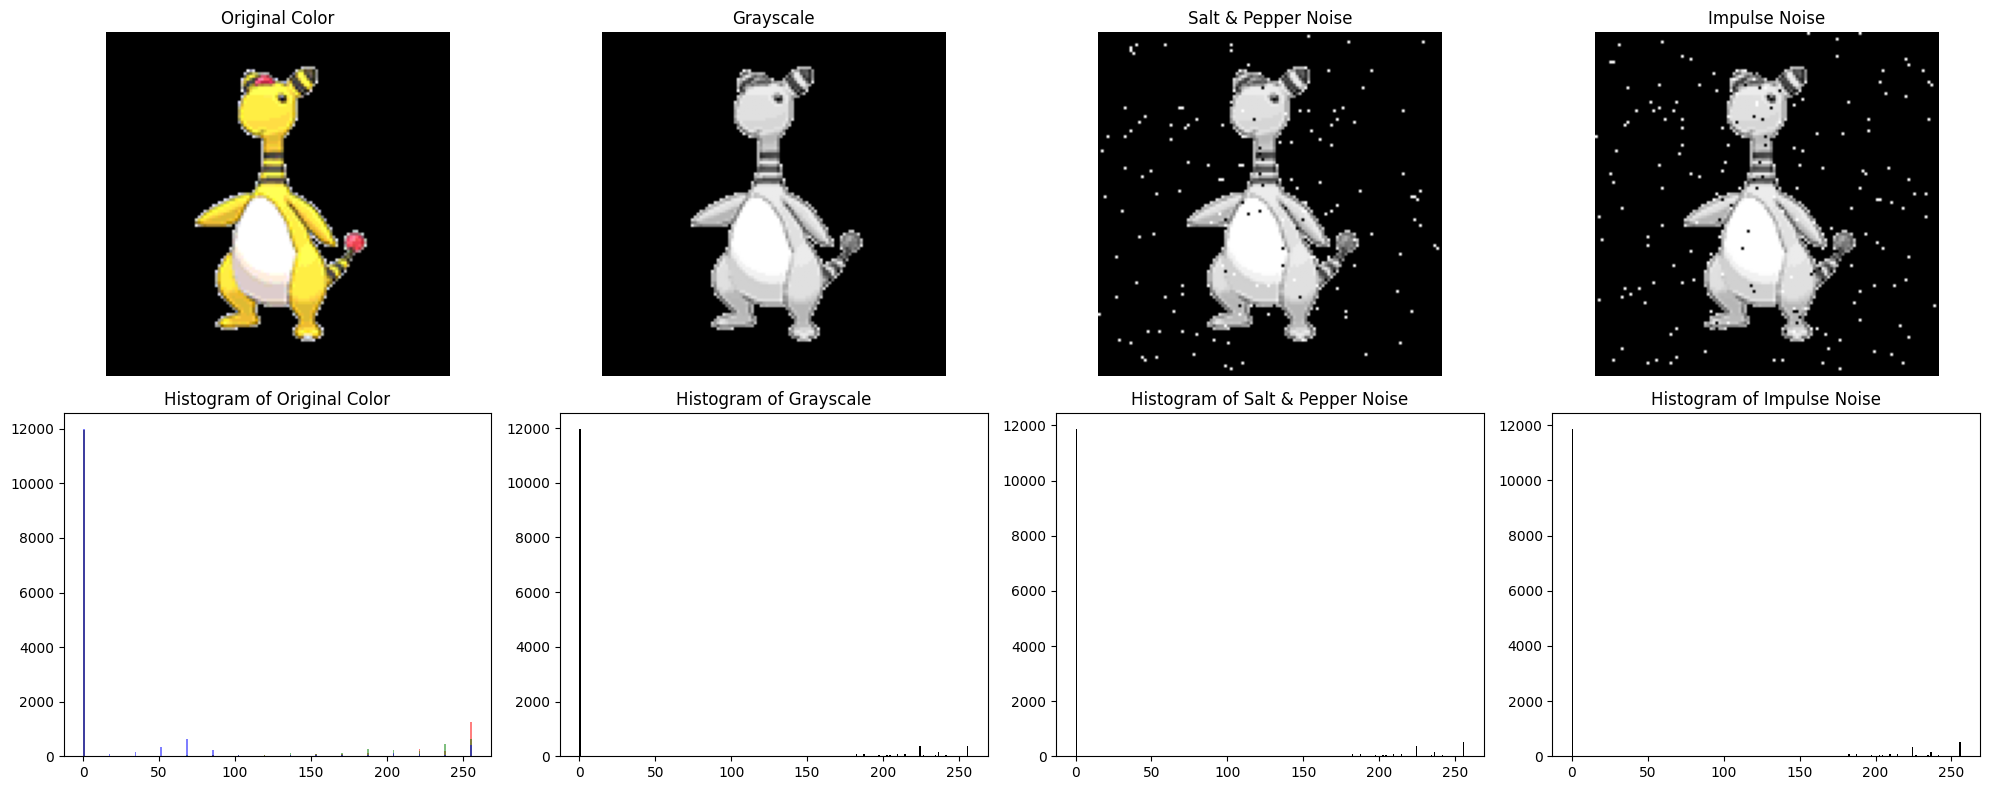


Processing: anorith.png


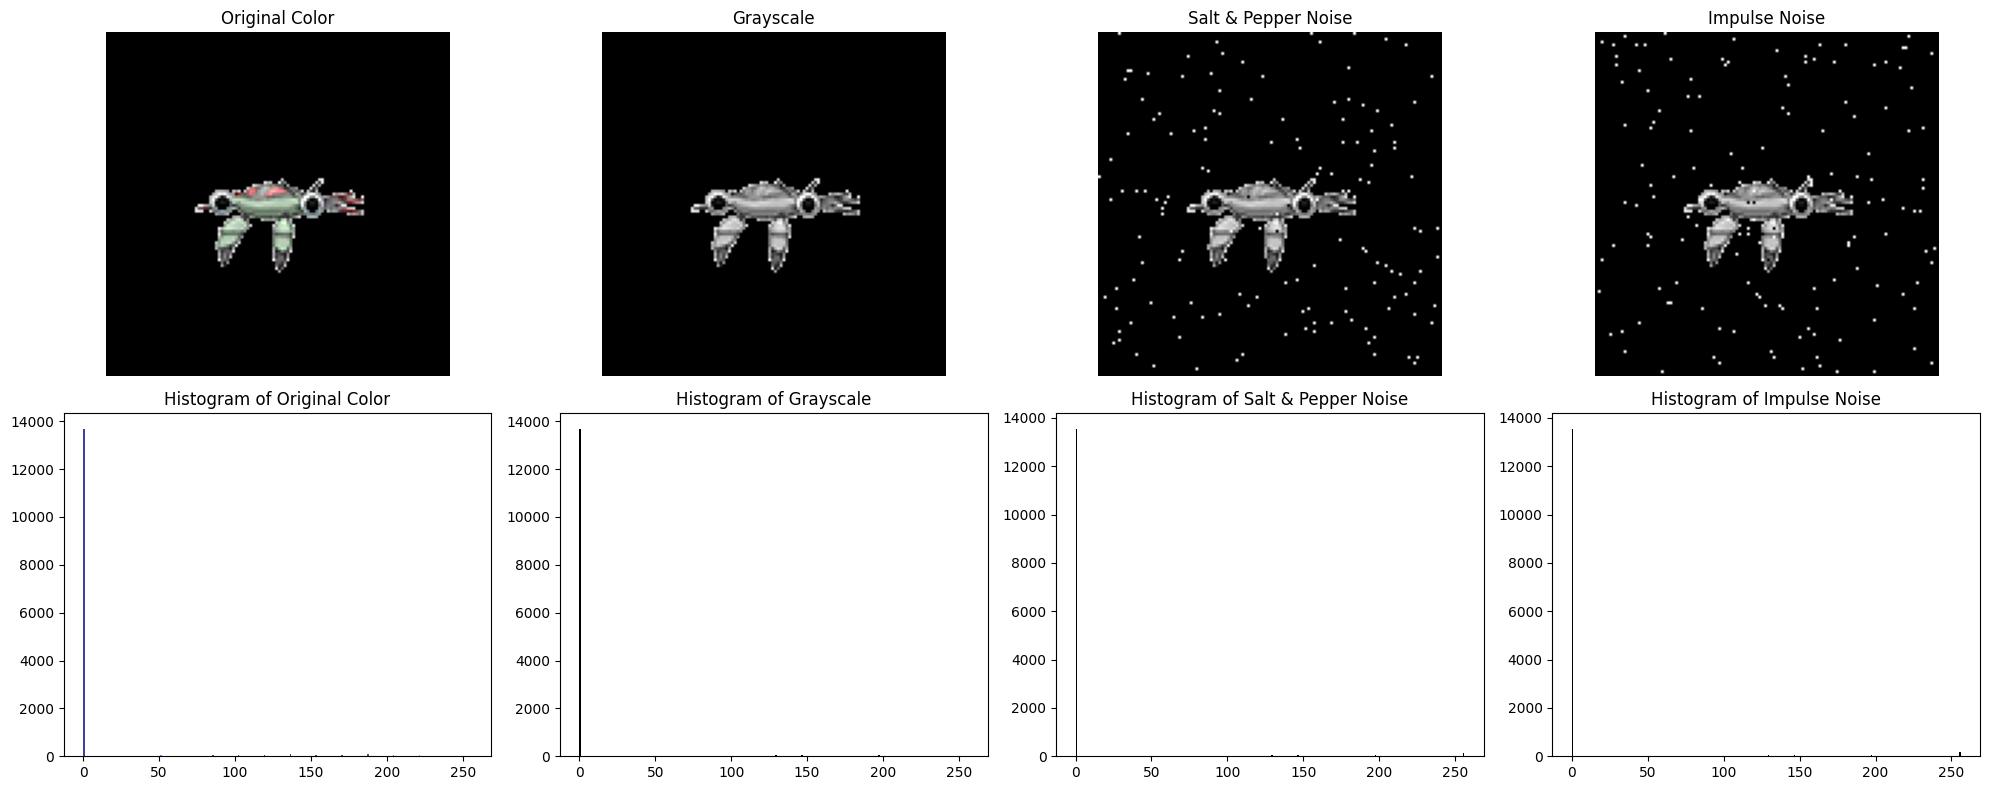


Processing: araquanid.png


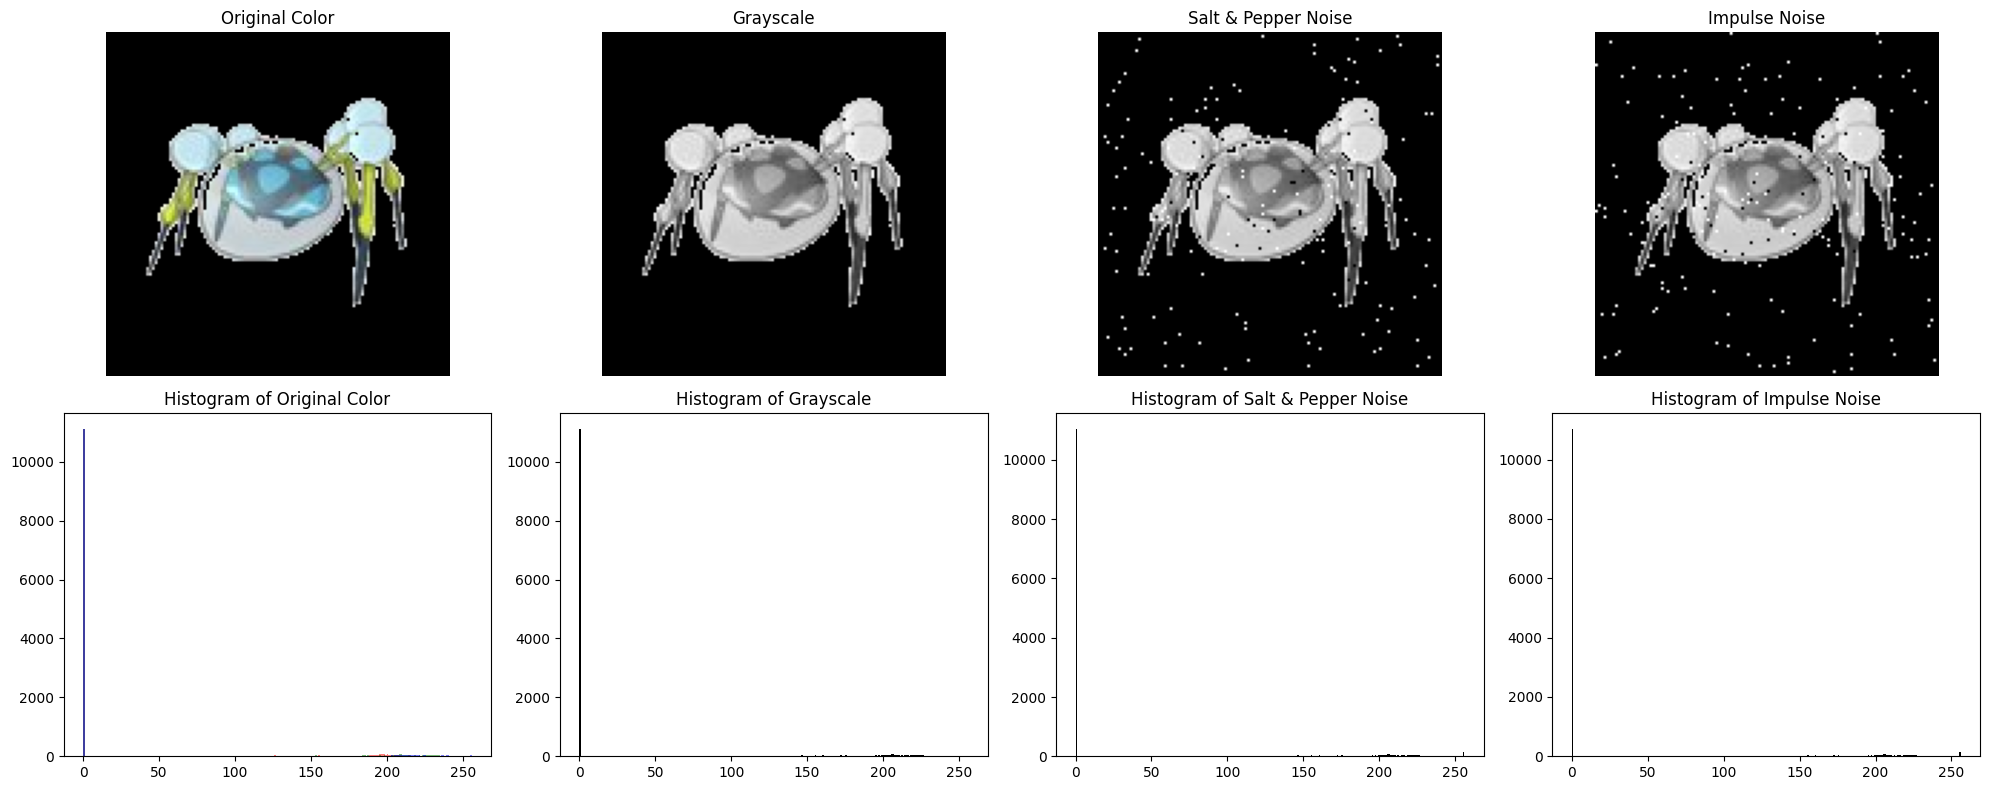


Processing: arbok.png


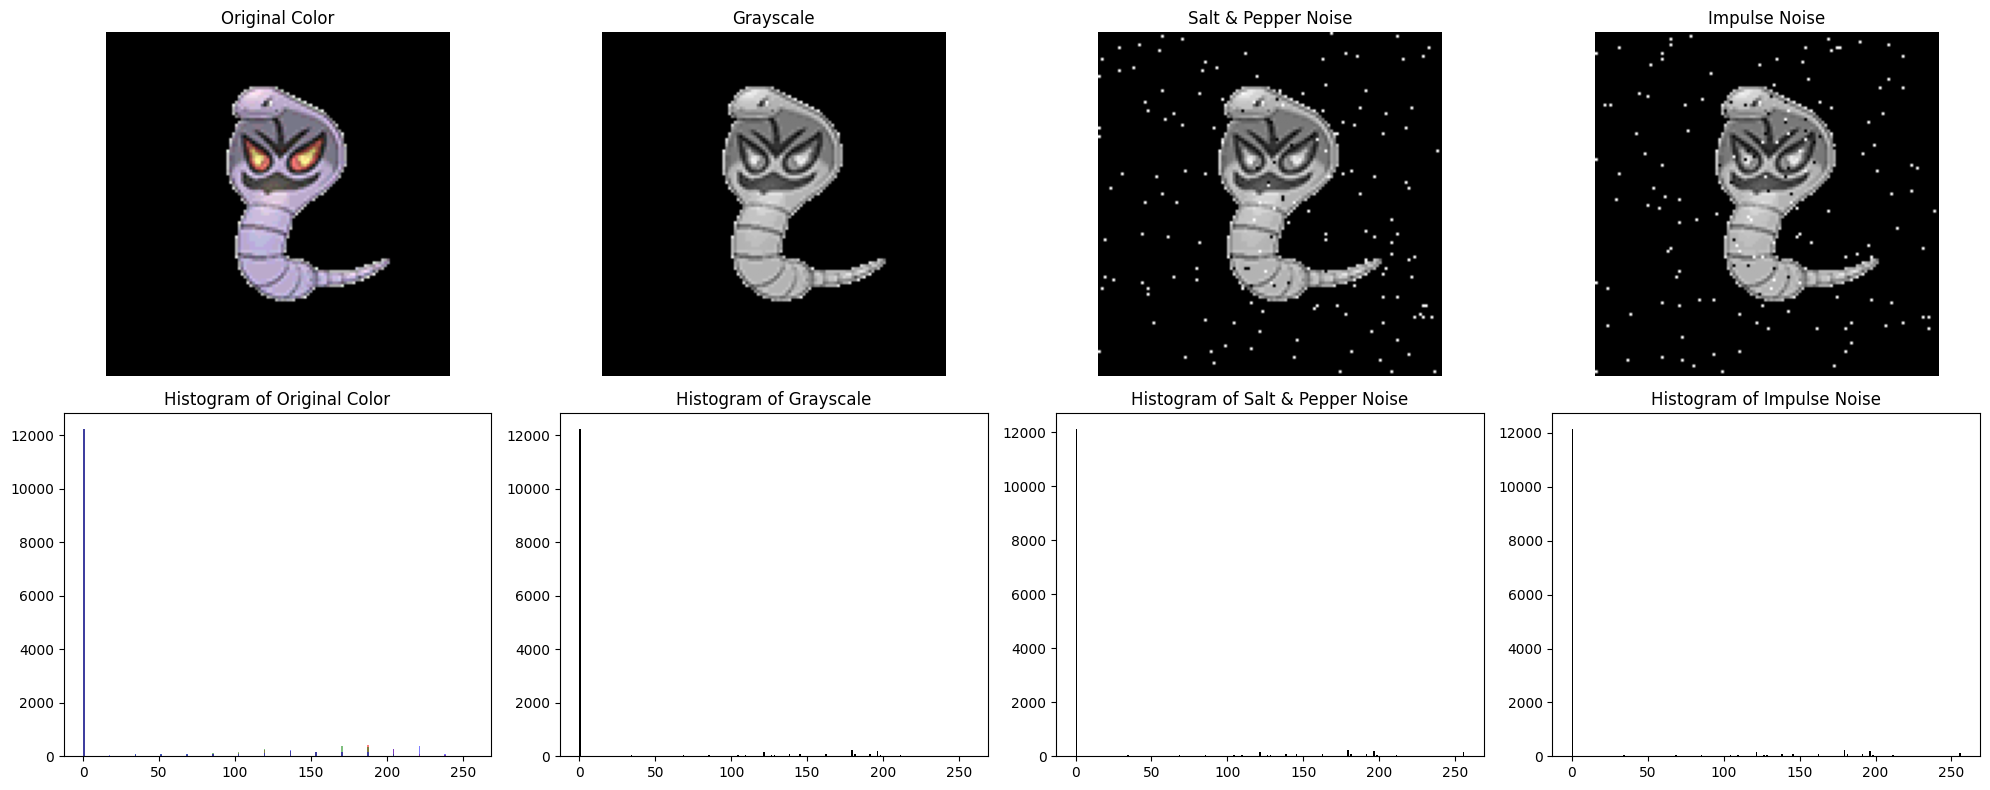


Processing: arcanine.png


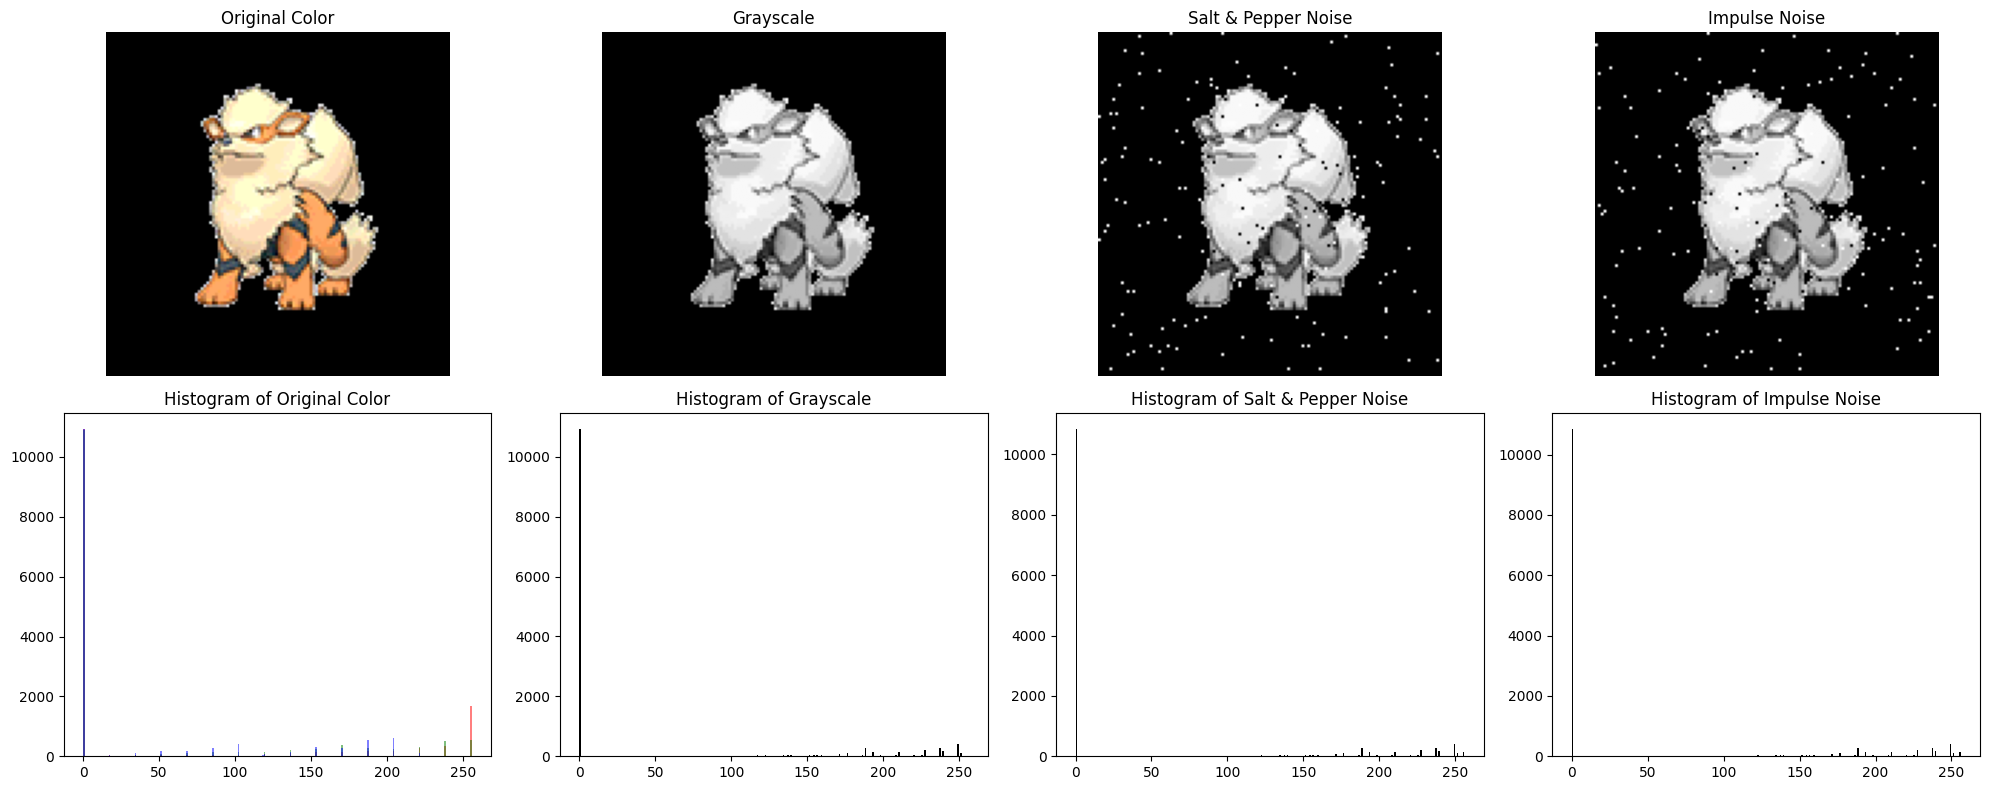


Processing: arceus.png


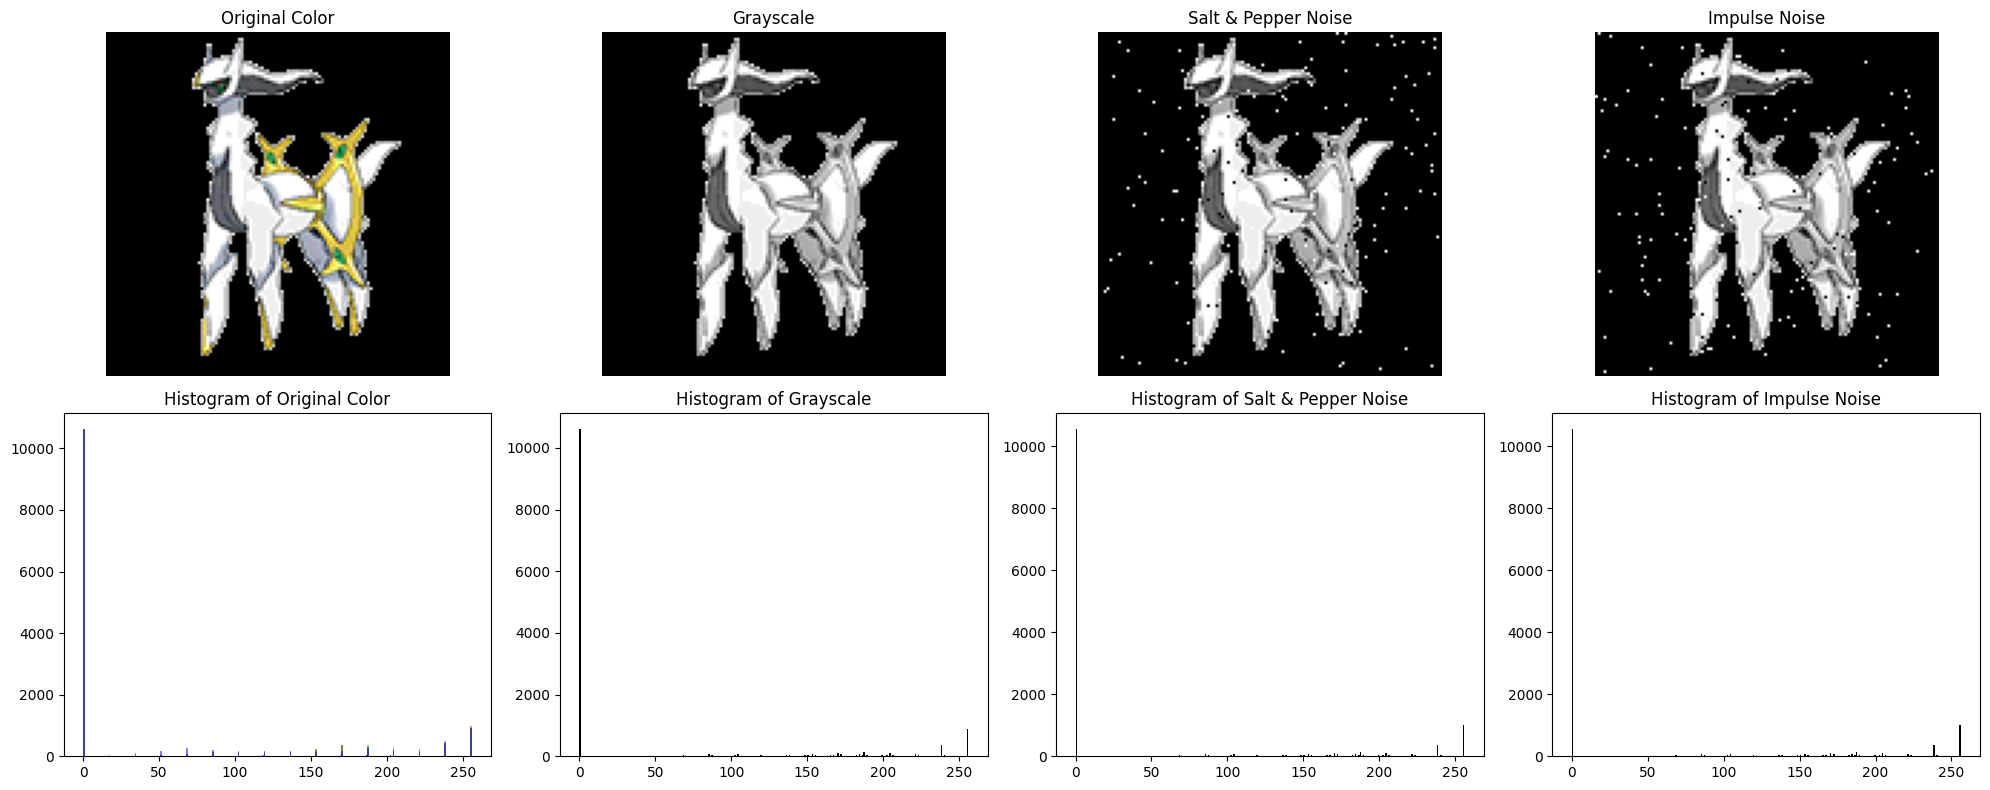


Processing: archen.png


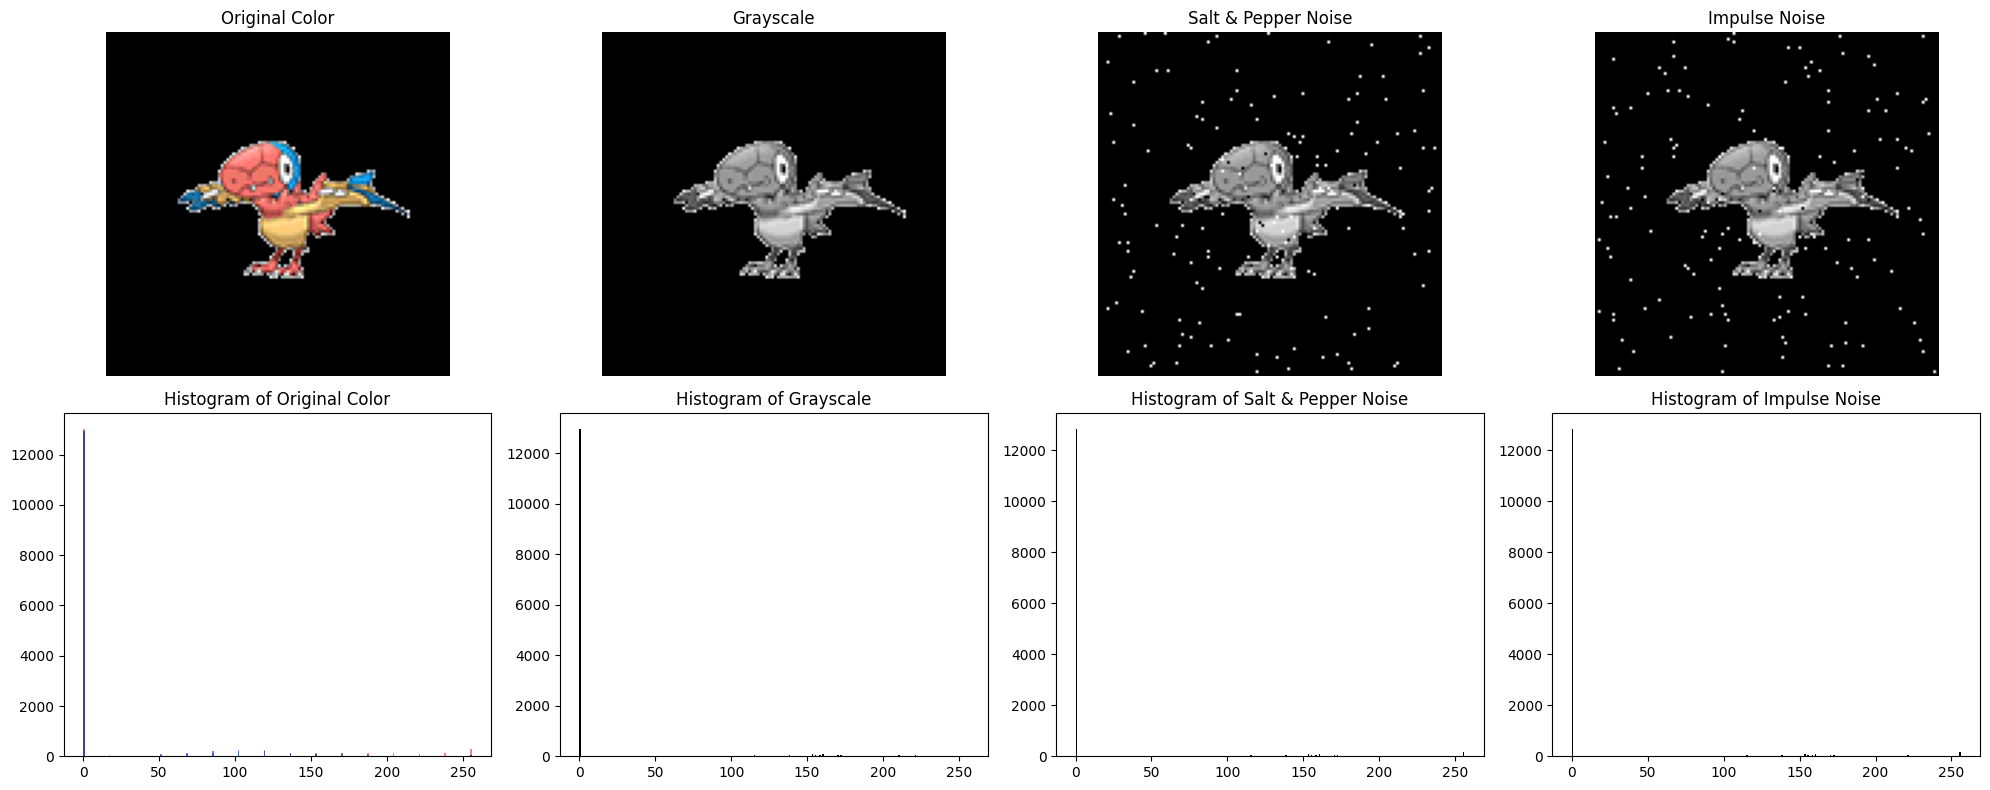


Processing: archeops.png


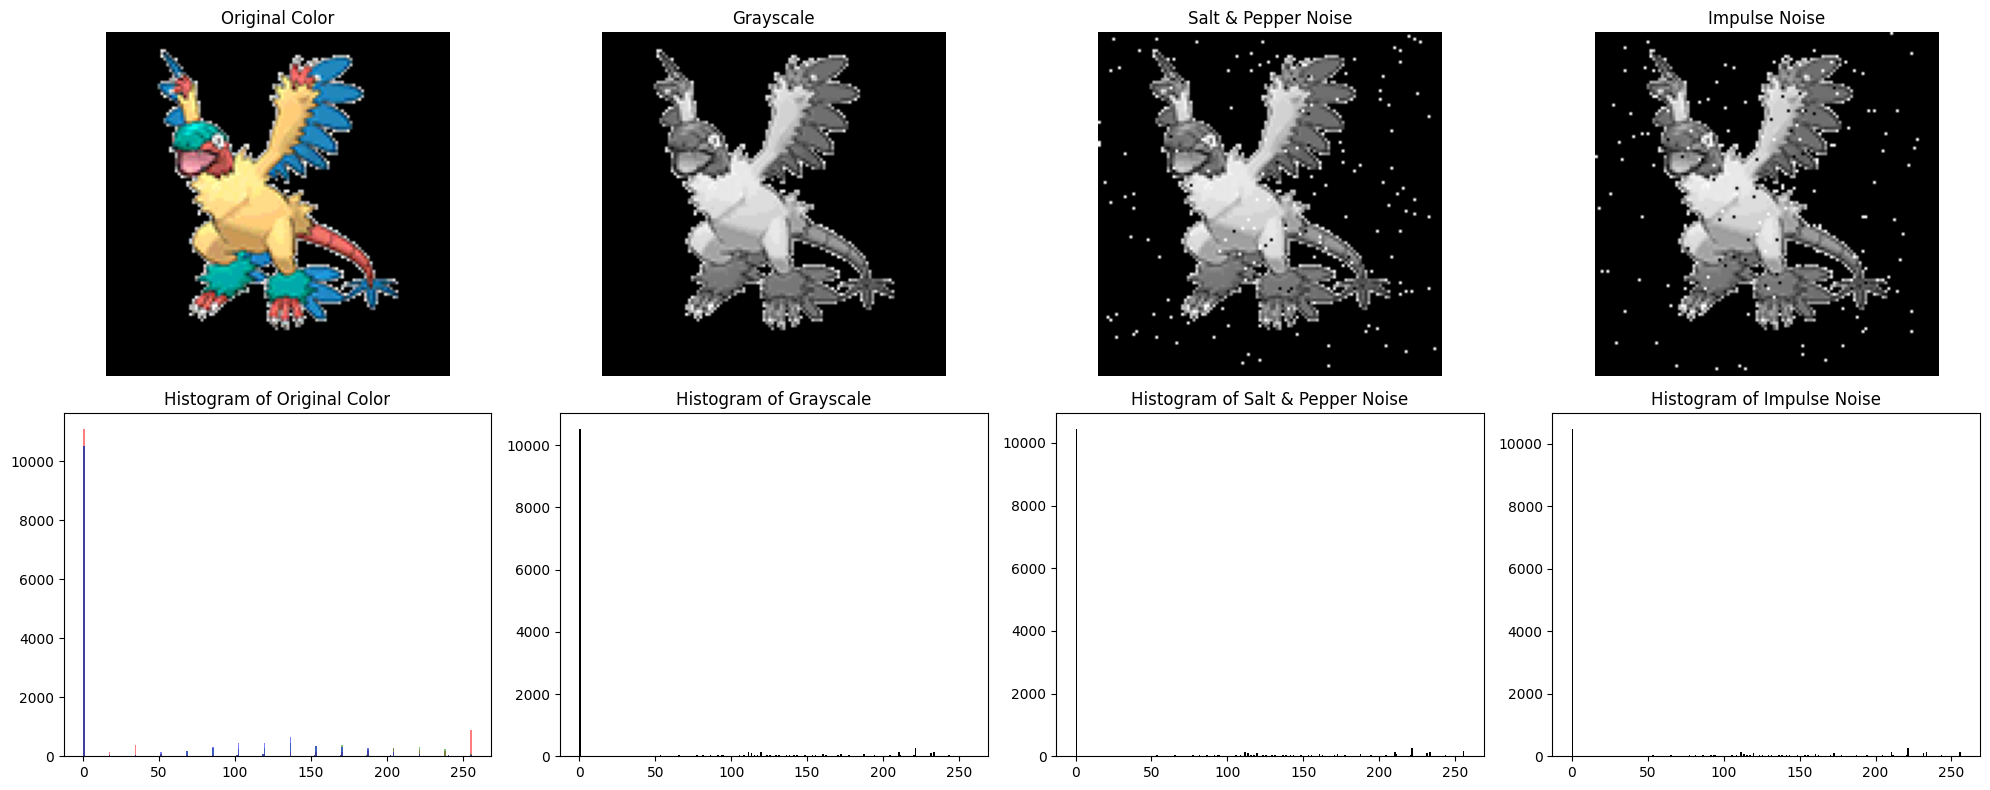


Processing: ariados.png


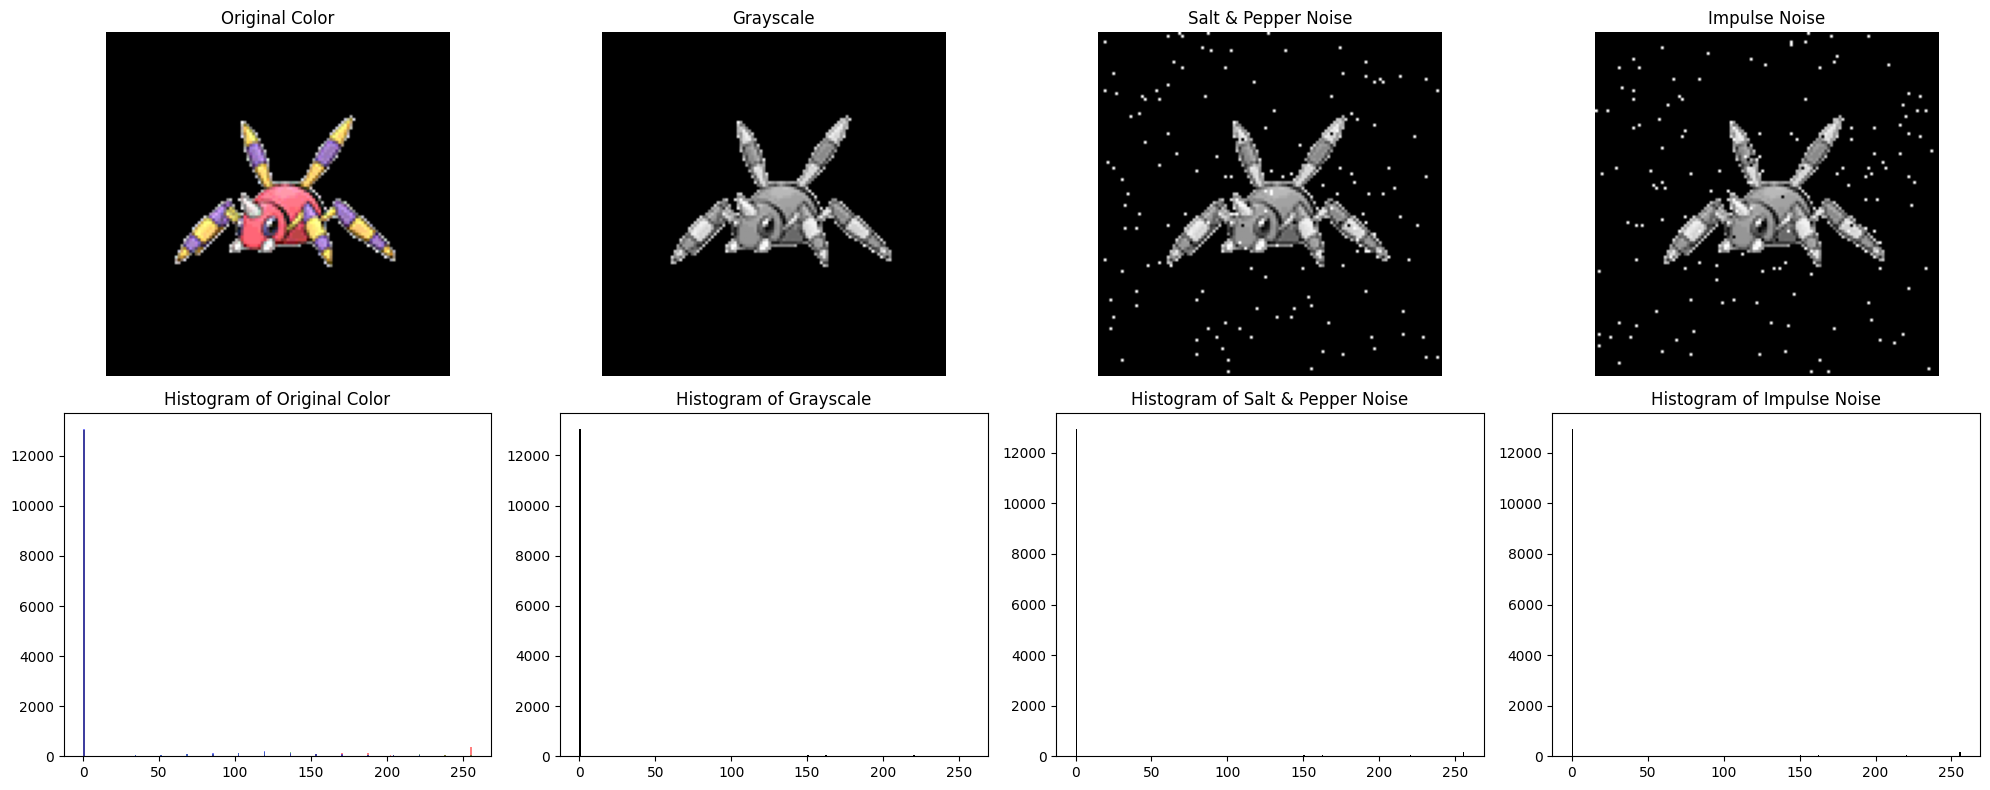


Processing: armaldo.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random


INPUT_DIR = r"C:\Users\amitm\Downloads\archive (11)\images"

def add_salt_and_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01):
    noisy = img.copy()
    total_pixels = img.size
    num_salt = int(salt_prob * total_pixels)
    num_pepper = int(pepper_prob * total_pixels)

    # Salt noise (white dots)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy[tuple(coords)] = 255

    # Pepper noise (black dots)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy[tuple(coords)] = 0
    return noisy


def add_impulse_noise(img, prob=0.02):
    noisy = img.copy()
    total_pixels = img.size
    num_impulse = int(prob * total_pixels)

    # Random positions for impulse noise
    coords = [np.random.randint(0, i - 1, num_impulse) for i in img.shape]
    # Randomly assign pixels to 0 or 255
    noisy[tuple(coords)] = np.random.choice([0, 255], num_impulse)
    return noisy


# -------------------------------
# Display Function
# -------------------------------

def show_images_with_hist(images, titles):
    n = len(images)
    fig, axes = plt.subplots(2, n, figsize=(5*n, 8))

    for i in range(n):
        img = images[i]
        title = titles[i]

        # Display image
        cmap = 'gray' if len(img.shape) == 2 else None
        axes[0, i].imshow(img, cmap=cmap)
        axes[0, i].set_title(title)
        axes[0, i].axis('off')

        # Display histogram
        if len(img.shape) == 3:  # Color
            colors = ('r', 'g', 'b')
            for j, c in enumerate(colors):
                axes[1, i].hist(img[:, :, j].ravel(), bins=256, range=[0, 256], color=c, alpha=0.5)
        else:  # Grayscale
            axes[1, i].hist(img.ravel(), bins=256, range=[0, 256], color='black')
        axes[1, i].set_title(f"Histogram of {title}")

    plt.tight_layout()
    plt.show()


# -------------------------------
# Main Program
# -------------------------------
for file in os.listdir(INPUT_DIR):
    if file.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        path = os.path.join(INPUT_DIR, file)
        print(f"\nProcessing: {file}")

        # Load image
        color_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

        # Apply noises
        sp_noisy = add_salt_and_pepper_noise(gray_img)
        impulse_noisy = add_impulse_noise(gray_img)

        # Display all
        show_images_with_hist(
            [color_img, gray_img, sp_noisy, impulse_noisy],
            ["Original Color", "Grayscale", "Salt & Pepper Noise", "Impulse Noise"]
        )
